Readme Notes:
    You will make different API requests for each individual question.
    Each API is different, so it is very important to read the documentation for each API to know how to use it properly.
    NOTE that the examples in the documentation don't use the `requests` package. You will need to look at the examples and         figure out which things go in the `url` and which things go in the `params`.
    Each dataset has its own api endpoint.
   

In [1]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

%matplotlib inline

# 1. Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches? 

In [2]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$limit=50000'

response = requests.get(endpoint)

In [3]:
response

<Response [200]>

In [4]:
response.text

'[{"month_name":"January","year":"2014","query_count":"223","query_text":"ebid"}\n,{"month_name":"January","year":"2014","query_count":"112","query_text":"property maps"}\n,{"month_name":"January","year":"2014","query_count":"97","query_text":"maps"}\n,{"month_name":"January","year":"2014","query_count":"90","query_text":"property tax"}\n,{"month_name":"January","year":"2014","query_count":"76","query_text":"jobs"}\n,{"month_name":"January","year":"2014","query_count":"75","query_text":"employment"}\n,{"month_name":"January","year":"2014","query_count":"73","query_text":"human resources"}\n,{"month_name":"January","year":"2014","query_count":"62","query_text":"police"}\n,{"month_name":"January","year":"2014","query_count":"61","query_text":"criminal court clerk"}\n,{"month_name":"January","year":"2014","query_count":"53","query_text":"media releases"}\n,{"month_name":"January","year":"2014","query_count":"50","query_text":"property taxes"}\n,{"month_name":"January","year":"2014","query

In [5]:
response = requests.get(endpoint)

In [6]:
result = response.json()

In [7]:
params = {
    'query_text' : 'fire',
    'year' : '2016'
}

In [8]:
response = requests.get(endpoint, params = params)

In [9]:
res = response.json()
res

[{'month_name': 'January',
  'year': '2016',
  'query_count': '19',
  'query_text': 'fire'},
 {'month_name': 'February',
  'year': '2016',
  'query_count': '35',
  'query_text': 'fire'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '26',
  'query_text': 'fire'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'June',
  'year': '2016',
  'query_count': '31',
  'query_text': 'fire'},
 {'month_name': 'July',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '47',
  'query_text': 'fire'},
 {'month_name': 'September',
  'year': '2016',
  'query_count': '36',
  'query_text': 'fire'},
 {'month_name': 'October',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '32',
  'query_text

In [10]:
res_df=pd.DataFrame(res)
res_df

month_name  year query_count query_text
0     January  2016          19       fire
1    February  2016          35       fire
2       March  2016          32       fire
3       April  2016          26       fire
4         May  2016          24       fire
5        June  2016          31       fire
6        July  2016          24       fire
7      August  2016          47       fire
8   September  2016          36       fire
9     October  2016          38       fire
10   November  2016          32       fire
11   December  2016          38       fire

In [11]:
res_df['query_count'] = pd.to_numeric(res_df['query_count'])
res_df

month_name  year  query_count query_text
0     January  2016           19       fire
1    February  2016           35       fire
2       March  2016           32       fire
3       April  2016           26       fire
4         May  2016           24       fire
5        June  2016           31       fire
6        July  2016           24       fire
7      August  2016           47       fire
8   September  2016           36       fire
9     October  2016           38       fire
10   November  2016           32       fire
11   December  2016           38       fire

In [12]:
top_fire_month = res_df.nlargest(1,['query_count'])
top_fire_month

month_name  year  query_count query_text
7     August  2016           47       fire

# 2. Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?  

query_min = >=100

endpoint = f'http://numbersapi.com/{query_min}'

response = requests.get(endpoint)

In [13]:
endpoint_2= 'https://data.nashville.gov/resource/fuaa-r5cm.json?$limit=50000'

response_2 = requests.get(endpoint_2)

In [14]:
response_2 = requests.get(endpoint_2)

In [15]:
result_2 = response_2.json()

In [16]:
result_2_df=pd.DataFrame(result_2)
result_2_df

month_name  year query_count         query_text month
0        January  2014         223               ebid   NaN
1        January  2014         112      property maps   NaN
2        January  2014          97               maps   NaN
3        January  2014          90       property tax   NaN
4        January  2014          76               jobs   NaN
...          ...   ...         ...                ...   ...
43672       July  2021           8     sign ordinance     7
43673       July  2021           8               snap     7
43674       July  2021           8     small business     7
43675       July  2021           8   water department     7
43676       July  2021           8  value of property     7

[43677 rows x 5 columns]

In [17]:
result_2_df['query_count'] = pd.to_numeric(result_2_df['query_count'])
result_2_df

month_name  year  query_count         query_text month
0        January  2014        223.0               ebid   NaN
1        January  2014        112.0      property maps   NaN
2        January  2014         97.0               maps   NaN
3        January  2014         90.0       property tax   NaN
4        January  2014         76.0               jobs   NaN
...          ...   ...          ...                ...   ...
43672       July  2021          8.0     sign ordinance     7
43673       July  2021          8.0               snap     7
43674       July  2021          8.0     small business     7
43675       July  2021          8.0   water department     7
43676       July  2021          8.0  value of property     7

[43677 rows x 5 columns]

In [18]:
params = {
    '$where' : 'query_count >= 100',
}


response_2 = requests.get(endpoint_2, params = params)


In [19]:
res_2 = response_2.json()
res_2

[{'month_name': 'October',
  'year': '2014',
  'query_count': '100',
  'query_text': 'maps'},
 {'month_name': 'April',
  'year': '2015',
  'query_count': '100',
  'query_text': 'employment'},
 {'month_name': 'April',
  'year': '2015',
  'query_count': '100',
  'query_text': 'Nashville'},
 {'month_name': 'October',
  'year': '2016',
  'query_count': '100',
  'query_text': 'property maps'},
 {'month_name': 'June',
  'year': '2017',
  'query_count': '100',
  'query_text': 'building permit'},
 {'month_name': 'June',
  'year': '2017',
  'query_count': '100',
  'query_text': 'assessor'},
 {'month_name': 'July',
  'year': '2017',
  'query_count': '100',
  'query_text': 'police report'},
 {'month_name': 'August',
  'year': '2017',
  'query_count': '100',
  'query_text': 'property tax'},
 {'month_name': 'August',
  'year': '2017',
  'query_count': '100',
  'query_text': 'property taxes'},
 {'month_name': 'August',
  'year': '2017',
  'query_count': '100',
  'query_text': 'building permit'},
 {'

In [20]:
res_2_df=pd.DataFrame(res_2)
res_2_df.tail()

month_name  year query_count         query_text month
1282  September  2018         750  annual enrollment   NaN
1283    October  2018         816  annual enrollment   NaN
1284    January  2019        2646          Nashville     1
1285  September  2019        5327          directory     9
1286  September  2019        5610               test     9

In [21]:
res_2_df.index[-1]

1286

In [22]:
res_2_df['query_count'] = pd.to_numeric(res_2_df['query_count'])
res_2_df

month_name  year  query_count         query_text month
0       October  2014          100               maps   NaN
1         April  2015          100         employment   NaN
2         April  2015          100          Nashville   NaN
3       October  2016          100      property maps   NaN
4          June  2017          100    building permit   NaN
...         ...   ...          ...                ...   ...
1282  September  2018          750  annual enrollment   NaN
1283    October  2018          816  annual enrollment   NaN
1284    January  2019         2646          Nashville     1
1285  September  2019         5327          directory     9
1286  September  2019         5610               test     9

[1287 rows x 5 columns]

In [23]:
top_qc = res_2_df.nlargest(1,['query_count'])
top_qc

month_name  year  query_count query_text month
1286  September  2019         5610       test     9

# 3. Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur? 

In [24]:
endpoint_3= 'https://data.nashville.gov/resource/fuaa-r5cm.json?query_text=codes&$limit=50000'

response_3= requests.get(endpoint_3)

In [25]:
response_3

<Response [200]>

In [26]:
result_3 = response_3.json()

In [27]:
result_3_df=pd.DataFrame(result_3)
result_3_df

month_name  year query_count query_text month
0     January  2014          37      codes   NaN
1    February  2014          75      codes   NaN
2       March  2014          90      codes   NaN
3       April  2014          65      codes   NaN
4         May  2014          84      codes   NaN
..        ...   ...         ...        ...   ...
81      March  2021         134      codes     3
82      April  2021         102      codes     4
83        May  2021         115      codes     5
84       June  2021         138      codes     6
85       July  2021         114      codes     7

[86 rows x 5 columns]

In [28]:
result_3_df['query_count'] = pd.to_numeric(result_3_df['query_count'])
result_3_df.head()

month_name  year  query_count query_text month
0    January  2014           37      codes   NaN
1   February  2014           75      codes   NaN
2      March  2014           90      codes   NaN
3      April  2014           65      codes   NaN
4        May  2014           84      codes   NaN

In [29]:
params = {
    '$where' : 'query_count >= 100',
}


response_3 = requests.get(endpoint_3, params = params)


In [30]:
res_3 = response_3.json()
res_3

[{'month_name': 'September',
  'year': '2015',
  'query_count': '101',
  'query_text': 'codes'},
 {'month_name': 'April',
  'month': '4',
  'year': '2021',
  'query_count': '102',
  'query_text': 'codes'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '104',
  'query_text': 'codes'},
 {'month_name': 'November',
  'month': '11',
  'year': '2020',
  'query_count': '104',
  'query_text': 'codes'},
 {'month_name': 'December',
  'year': '2017',
  'query_count': '106',
  'query_text': 'codes'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '107',
  'query_text': 'codes'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '111',
  'query_text': 'codes'},
 {'month_name': 'July',
  'month': '7',
  'year': '2021',
  'query_count': '114',
  'query_text': 'codes'},
 {'month_name': 'January',
  'year': '2017',
  'query_count': '115',
  'query_text': 'codes'},
 {'month_name': 'May',
  'month': '5',
  'year': '2021',
  'query_count': '115',
  'query_text': 'codes'

In [31]:
res_3_df=pd.DataFrame(res_3)
res_3_df

month_name  year query_count query_text month
0   September  2015         101      codes   NaN
1       April  2021         102      codes     4
2      August  2016         104      codes   NaN
3    November  2020         104      codes    11
4    December  2017         106      codes   NaN
5         May  2016         107      codes   NaN
6       April  2016         111      codes   NaN
7        July  2021         114      codes     7
8     January  2017         115      codes   NaN
9         May  2021         115      codes     5
10     August  2015         117      codes   NaN
11   February  2016         121      codes   NaN
12   February  2019         124      codes     2
13       June  2019         125      codes     6
14  September  2019         126      codes     9
15    January  2019         129      codes     1
16  September  2020         130      codes     9
17   February  2021         131      codes     2
18      March  2019         133      codes     3
19   November  2019         134      codes    11
20      March  2021         134      codes     3
21   November  2017         138      codes   NaN
22       June  2021         138      codes     6
23    October  2020         139      codes    10
24   December  2019         143      codes    12
25   February  2017         150      codes   NaN
26     August  2019         156      codes     8
27      March  2017         158      codes   NaN
28    October  2019         159      codes    10
29       July  2019         161      codes     7
30    January  2020         161      codes     1
31      March  2020         164      codes     3
32       July  2020         164      codes     7
33   December  2020         165      codes    12
34       July  2018         166      codes   NaN
35  September  2017         168      codes   NaN
36      April  2019         168      codes     4
37      April  2018         170      codes   NaN
38  September  2018         171      codes   NaN
39    October  2018         174      codes   NaN
40     August  2020         178      codes     8
41   February  2020         181      codes     2
42        May  2018         183      codes   NaN
43        May  2020         184      codes     5
44      March  2018         185      codes   NaN
45      April  2017         190      codes   NaN
46    January  2021         191      codes     1
47       June  2017         192      codes   NaN
48   November  2018         201      codes   NaN
49       June  2018         204      codes   NaN
50    October  2017         206      codes   NaN
51       June  2020         208      codes     6
52       July  2017         215      codes   NaN
53     August  2017         222      codes   NaN
54     August  2018         225      codes   NaN
55        May  2017         269      codes   NaN

In [32]:
res_3_df.index[-1]

55

# 4. Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

In [33]:
endpoint_4= 'https://data.nashville.gov/resource/fuaa-r5cm.json'

response_4= requests.get(endpoint_4)

In [34]:
response_4

<Response [200]>

In [35]:
result_4 = response_4.json()

In [36]:
result_4_df=pd.DataFrame(result_4)
result_4_df. head()

month_name  year query_count     query_text
0    January  2014         223           ebid
1    January  2014         112  property maps
2    January  2014          97           maps
3    January  2014          90   property tax
4    January  2014          76           jobs

In [37]:
result_4_df['query_count'] = pd.to_numeric(result_4_df['query_count'])
result_4_df.head()

month_name  year  query_count     query_text
0    January  2014          223           ebid
1    January  2014          112  property maps
2    January  2014           97           maps
3    January  2014           90   property tax
4    January  2014           76           jobs

In [38]:
params = {
    'query_text' : 'maps',
}


response_4 = requests.get(endpoint_4, params = params)


In [39]:
res_4 = response_4.json()
res_4

[{'month_name': 'January',
  'year': '2014',
  'query_count': '97',
  'query_text': 'maps'},
 {'month_name': 'February',
  'year': '2014',
  'query_count': '140',
  'query_text': 'maps'},
 {'month_name': 'March',
  'year': '2014',
  'query_count': '144',
  'query_text': 'maps'},
 {'month_name': 'April',
  'year': '2014',
  'query_count': '152',
  'query_text': 'maps'},
 {'month_name': 'May',
  'year': '2014',
  'query_count': '119',
  'query_text': 'maps'},
 {'month_name': 'June',
  'year': '2014',
  'query_count': '121',
  'query_text': 'maps'},
 {'month_name': 'July',
  'year': '2014',
  'query_count': '121',
  'query_text': 'maps'},
 {'month_name': 'August',
  'year': '2014',
  'query_count': '118',
  'query_text': 'maps'},
 {'month_name': 'September',
  'year': '2014',
  'query_count': '115',
  'query_text': 'maps'},
 {'month_name': 'October',
  'year': '2014',
  'query_count': '100',
  'query_text': 'maps'},
 {'month_name': 'November',
  'year': '2014',
  'query_count': '82',
  'q

In [40]:
maps_4_df=pd.DataFrame(res_4)
maps_4_df. head()

month_name  year query_count query_text month
0    January  2014          97       maps   NaN
1   February  2014         140       maps   NaN
2      March  2014         144       maps   NaN
3      April  2014         152       maps   NaN
4        May  2014         119       maps   NaN

In [41]:
maps_4_df.dtypes

month_name     object
year           object
query_count    object
query_text     object
month          object
dtype: object

In [42]:
maps_4_df['query_count'] = pd.to_numeric(maps_4_df['query_count'])
maps_4_df.head()

month_name  year  query_count query_text month
0    January  2014           97       maps   NaN
1   February  2014          140       maps   NaN
2      March  2014          144       maps   NaN
3      April  2014          152       maps   NaN
4        May  2014          119       maps   NaN

In [43]:
maps_4_df.dtypes

month_name     object
year           object
query_count     int64
query_text     object
month          object
dtype: object

In [44]:
maps_4_df=maps_4_df.groupby('month_name')['query_count'].sum()

In [45]:
maps_4_df=pd.DataFrame(maps_4_df).reset_index()
maps_4_df

month_name  query_count
0       April         1309
1      August          991
2    December          556
3    February          832
4     January          924
5        July         1062
6        June         1216
7       March         1090
8         May         1019
9    November          805
10    October          981
11  September          951

In [46]:
data = {
    'smonth': ['April','August','December','February','January','July','June','March','May','November','October','September']
   ,'query_count': [1309,991,556,832,924,1062,1216,1090,1019,805,981,951],
    'mindex' : [4,8,12,2,1,7,6,3,5,11,10,9]
}
reorder_df = pd.DataFrame(data)

In [47]:
reorder_df

smonth  query_count  mindex
0       April         1309       4
1      August          991       8
2    December          556      12
3    February          832       2
4     January          924       1
5        July         1062       7
6        June         1216       6
7       March         1090       3
8         May         1019       5
9    November          805      11
10    October          981      10
11  September          951       9

In [48]:
reorder_df.dtypes

smonth         object
query_count     int64
mindex          int64
dtype: object

In [49]:
maps_4_df=reorder_df.sort_values('mindex',ascending=True)

In [50]:
from matplotlib.pyplot import figure

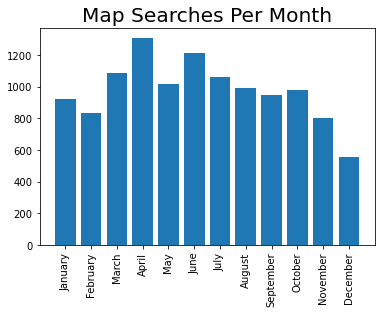

In [51]:
plt.bar(maps_4_df['smonth'],maps_4_df['query_count'])
plt.style.use('fivethirtyeight')
plt.title('Map Searches Per Month')
plt.xticks(rotation = 90)
plt.show()

# 5. Make an API request to pull back all the data from [hubNashville (311) Service Requests](https://data.nashville.gov/Public-Services/hubNashville-311-Service-Requests/7qhx-rexh) (check to see how many rows you can return in a single request). Compare it to the Top 500 Monthly Searches data set. What do you observe? (This is open-ended, there isn't a specific answer for this one)  

In [52]:
endpoint_5= 'https://data.nashville.gov/resource/7qhx-rexh.json?$limit=1000000'

response_5= requests.get(endpoint_5)

http://data.consumerfinance.gov/resource/x94z-ydhh.json?$limit=50000&$$app_token=XXXXXXXXXXXXXXXX

In [53]:
response_5

<Response [200]>

In [54]:
result_5 = response_5.json()

In [55]:
result_5_df=pd.DataFrame(result_5)
result_5_df. tail()

case_number  status                 case_request  \
984957         747  Closed    Trash, Recycling & Litter   
984958      817299  Closed  Customer Experience Surveys   
984959        3615  Closed    Trash, Recycling & Litter   
984960        1763  Closed   Streets, Roads & Sidewalks   
984961      822206  Closed  Customer Experience Surveys   

                                          case_subrequest  \
984957                      Residential Dumpster Services   
984958  Parks - 2021 Electric Bike Greenway Access Survey   
984959               Missed Pickup - Recycle Cart Service   
984960                                    Illegal Dumping   
984961  Parks - 2021 Electric Bike Greenway Access Survey   

                                    additional_subrequest  \
984957                      Missed Dumpster Trash Service   
984958  Parks - 2021 Electric Bike Greenway Access Survey   
984959             Recycle - Curbside/Alley Missed Pickup   
984960                                            Roadway   
984961  Parks - 2021 Electric Bike Greenway Access Survey   

               date_time_opened             case_origin state_issue  \
984957  2017-07-18T13:19:00.000                   Phone       FALSE   
984958  2021-11-03T09:27:00.000  hubNashville Community       FALSE   
984959  2017-07-31T14:50:00.000                   Phone       FALSE   
984960  2017-07-21T12:37:00.000                   Phone       FALSE   
984961  2021-11-09T07:45:00.000  hubNashville Community       FALSE   

       closed_when_created        incident_address  ...  \
984957                TRUE  2021 Fatherland Street  ...   
984958                TRUE                     NaN  ...   
984959                TRUE     1309 Twin Circle Dr  ...   
984960                TRUE    1329 Apple Valley Rd  ...   
984961                TRUE                     NaN  ...   

       :@computed_region_kh5x_g7w5 :@computed_region_cfa7_hbpz  \
984957                           7                         NaN   
984958                         NaN                         NaN   
984959                          27                         131   
984960                          10                         425   
984961                         NaN                         NaN   

       :@computed_region_sjpq_96s8 :@computed_region_gisn_y5cm  \
984957                       15548                           2   
984958                         NaN                         NaN   
984959                       16166                           7   
984960                        1527                           4   
984961                         NaN                         NaN   

       :@computed_region_b9k3_hpc2         date_time_closed oem_id  \
984957                           7  2017-07-26T08:47:00.000    NaN   
984958                         NaN  2021-11-03T09:27:00.000    NaN   
984959                           8  2017-08-02T04:03:00.000    NaN   
984960                           2  2017-07-28T16:22:00.000    NaN   
984961                         NaN  2021-11-09T07:45:00.000    NaN   

       contact_type parent_case preferred_language  
984957          NaN         NaN                NaN  
984958          NaN         NaN                NaN  
984959     Resident         NaN                NaN  
984960          NaN         NaN                NaN  
984961          NaN         NaN                NaN  

[5 rows x 34 columns]

In [56]:
result_5_df.index[-1]

984961

In [57]:
#Top 500 only returned about 43,000 results where the 311 returned almost 1,000,000.


# 6. Find 2 new data sets on data.nashville.gov, make API requests to pull the data, and do an analysis that combines the data sets.

In [ ]:
#pothole : https://data.cityofchicago.org/resource/7as2-ds3y.json

In [80]:
endpoint_6= 'https://data.cityofchicago.org/resource/7as2-ds3y.json?$limit=1000000'

response_6= requests.get(endpoint_6)

In [81]:
response_6

<Response [200]>

In [82]:
result_6 = response_6.json()

In [83]:
result_6ph_df=pd.DataFrame(result_6)
result_6ph_df. tail()

creation_date     status service_request_number  \
560473  2010-03-11T00:00:00.000  Completed            10-00317212   
560474  2010-02-26T00:00:00.000  Completed            10-00254019   
560475  2009-08-27T00:00:00.000  Completed            09-01501980   
560476  2009-06-17T00:00:00.000  Completed            09-01026546   
560477  2009-01-12T00:00:00.000  Completed            09-00061329   

       type_of_service_request      street_address    zip      x_coordinate  \
560473      Pot Hole in Street  7201 W BELMONT AVE  60634               NaN   
560474      Pot Hole in Street  1440 S ROCKWELL ST  60608  1159269.23551363   
560475      Pot Hole in Street    5518 N WAYNE AVE  60640               NaN   
560476      Pot Hole in Street   3845 W ADDISON ST  60618    1150061.260005   
560477      Pot Hole in Street   2519 S HALSTED ST  60608  1171396.98668084   

            y_coordinate ward police_district  ...  \
560473               NaN   36              25  ...   
560474  1892878.64971463   28              10  ...   
560475               NaN   48              20  ...   
560476      1923654.9403   30              17  ...   
560477  1887375.74666743   11               9  ...   

       :@computed_region_awaf_s7ux :@computed_region_6mkv_f3dw  \
560473                          39                       22254   
560474                          11                       14920   
560475                          40                       22616   
560476                          27                       21538   
560477                          26                       14920   

       :@computed_region_vrxf_vc4k :@computed_region_bdys_3d7i  \
560473                          17                         424   
560474                          30                          16   
560475                          76                         540   
560476                          22                         138   
560477                          58                          59   

       :@computed_region_43wa_7qmu  ssa          completion_date  \
560473                           7  NaN  2011-03-28T00:00:00.000   
560474                          23  NaN  2011-10-04T00:00:00.000   
560475                          16  NaN  2011-01-25T00:00:00.000   
560476                          21  NaN  2011-06-07T00:00:00.000   
560477                          48  NaN  2011-10-06T00:00:00.000   

       current_activity most_recent_action number_of_potholes_filled_on_block  
560473    Dispatch Crew    Pothole Patched                                  5  
560474              NaN                NaN                                NaN  
560475      Site Survey   No Problem Found                                 80  
560476    Dispatch Crew    Pothole Patched                                NaN  
560477    Dispatch Crew    Pothole Patched                                 33  

[5 rows x 24 columns]

In [84]:
result_6ph_df.index[-1]

560477